In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a dataset

In [ ]:
 features, labels = make_blobs(n_samples=200, centers=3, cluster_std=5)

In [ ]:
features.shape

(200, 2)

In [ ]:
features.T.shape

(2, 200)

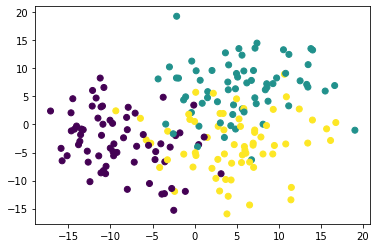

In [ ]:
plt.scatter(features.T[0,:],features.T[1,:],c=labels)

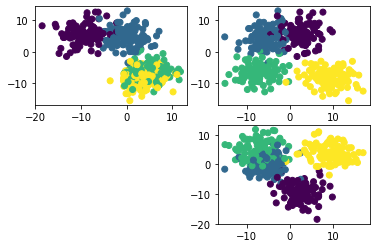

In [ ]:
features, labels = make_blobs(n_samples=400, n_features=3, centers=4, cluster_std=3,random_state=10)
plt.subplot(2,2,1)
plt.scatter(features.T[1,:],features.T[0,:],c=labels)
plt.subplot(2,2,2)
plt.scatter(features.T[2,:],features.T[0,:],c=labels)
plt.subplot(2,2,4)
plt.scatter(features.T[2,:],features.T[1,:],c=labels)

# Normilize Data

In [ ]:
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
#alternatively you can just use fit transform
#scaled_features = scaler.fit_transform(features)

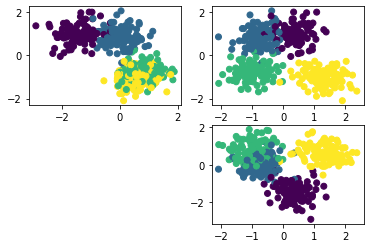

In [ ]:
plt.subplot(2,2,1)
plt.scatter(scaled_features.T[1,:],scaled_features.T[0,:],c=labels)
plt.subplot(2,2,2)
plt.scatter(scaled_features.T[2,:],scaled_features.T[0,:],c=labels)
plt.subplot(2,2,4)
plt.scatter(scaled_features.T[2,:],scaled_features.T[1,:],c=labels)

# K-Means

In [ ]:
# Number of clusters
kmeans = KMeans(n_clusters=4,init='random')
# Fitting the input data
kmeans = kmeans.fit(scaled_features)
# Getting the cluster labels
clusters_assigned = kmeans.predict(scaled_features)
# Centroid values
centroids = kmeans.cluster_centers_

In [ ]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
kmeans.n_iter_

8

n_init is super important?!

In [ ]:
centroids

array([[ 0.84028253,  0.0113378 , -0.73039831],
       [-0.80704188,  0.82783906, -0.95665748],
       [-1.03243969,  0.62115143,  1.32589246],
       [ 0.98188788, -1.46903386,  0.39295981]])

In [ ]:
kmeans.n_iter_

8

In [ ]:
kmeans.inertia_

206.22236896296408

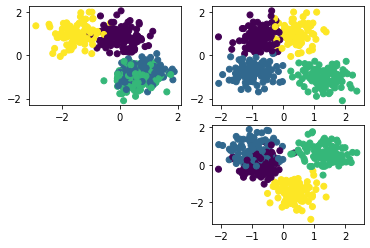

In [ ]:
plt.subplot(2,2,1)
plt.scatter(scaled_features.T[1,:],scaled_features.T[0,:],c=clusters_assigned)
plt.subplot(2,2,2)
plt.scatter(scaled_features.T[2,:],scaled_features.T[0,:],c=clusters_assigned)
plt.subplot(2,2,4)
plt.scatter(scaled_features.T[2,:],scaled_features.T[1,:],c=clusters_assigned)

# Select the best K (Number of clusters)


## Elbow Method

How Sum of Squared Error changes as K changes in Kmeans

In [ ]:
sse = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init= "random")
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

In [ ]:
sse

[643.0899991780234,
 354.50246300191293,
 206.22236896296408,
 189.95853670924618,
 173.85700220959828,
 160.6928307697755,
 152.39064222430983,
 137.43768890425946,
 132.2646318525009]

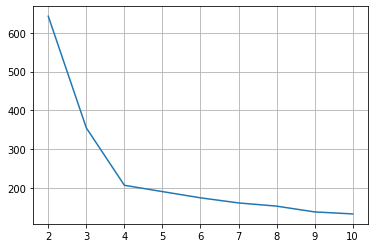

In [ ]:
plt.plot([i for i in range(2,11)],sse)
plt.grid()

## Silhouette coefficient

In [ ]:
from sklearn.metrics import silhouette_score

sse = []
slc=[]
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init= "random")
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)
  slc.append(silhouette_score(scaled_features, kmeans.labels_))

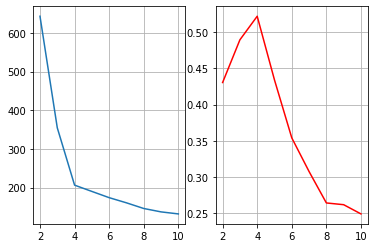

In [ ]:
plt.subplot(1,2,1)
plt.plot([i for i in range(2,11)],sse)
plt.grid()
plt.subplot(1,2,2)
plt.plot([i for i in range(2,11)],slc,color='red')
plt.grid()